# Task C

## Goal

1. iterative Method
    1. Calc smallest and biggest eigenvalue 
    2. Calc (all?) eigenvectors?
2. verfiy using some linalg libaray

## sonstiges Wissen

[doppelt stoachastisch](https://de.wikipedia.org/wiki/Doppelt-stochastische_Matrix), daraus folgt:
+ betragsgrößter eigenwert = 1

I use power iteration as described in the lecture of 15.03.2024 and in the code on the [github](https://github.com/nordam/ComputationalPhysics/blob/master/Notebooks/11%20-%20Eigenvalues%2C%20eigenvectors%20and%20SVD.ipynb). I used the code example provided there.


In [22]:
from tools import power_iteration, generate_matrix_simple
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Parameter
nodes = 21
starting_x = 10
connections = [-2,-1,1,2]
maxiter = 1000
tol = 1e-6

In [16]:
# generate inital_state and matrix
t_matrix = generate_matrix_simple(nodes,connections)

In [17]:
# find biggest eigenvalue
eig_val_big, eig_vec_big, conv_status = power_iteration(t_matrix, maxiter, tol)
print(f"eigenvalue: {eig_val_big}")
print(f"eigenvector: {eig_vec_big}")
print(f"converged: {conv_status}")

eigenvalue: 0.999999999992648
eigenvector: [0.21821642 0.21821596 0.21821566 0.21821557 0.21821568 0.21821599
 0.21821647 0.21821707 0.21821775 0.21821843 0.21821908 0.21821961
 0.21821999 0.21822019 0.21822018 0.21821997 0.21821957 0.21821903
 0.21821838 0.21821769 0.21821702]
converged: False


In [18]:
# Now we find the (absolute) smallest eigenvalue
# First step inverting the Matrix 
inv_t_matrix = np.linalg.inv(t_matrix)
inv_eig_val, inv_eig_vec, conv_status = power_iteration(inv_t_matrix, maxiter, tol)
# calculate the smalles eig_value
eig_val_small = 1/inv_eig_val
eig_vec_small = inv_eig_vec
print(f"eigenvalue: {eig_val_small}")
print(f"eigenvector: {eig_vec_small}")
print(f"converged: {conv_status}")


eigenvalue: 0.016629010219493902
eigenvector: [-1.33623186e-01  9.06704623e-02 -4.56923101e-02 -3.06532846e-04
  4.62985284e-02 -9.12562912e-02  1.34175539e-01 -1.74097528e-01
  2.10130465e-01 -2.41469435e-01  2.67414376e-01 -2.87385723e-01
  3.00937347e-01 -3.07766528e-01  3.07720714e-01 -3.00800927e-01
  2.87161745e-01 -2.67107844e-01  2.41087195e-01 -2.09681056e-01
  1.73590989e-01]
converged: True


[-0.5617449  -0.5617449  -0.5        -0.5        -0.45705037 -0.45705037
 -0.32916089 -0.32916089 -0.18385542 -0.18385542 -0.13873953 -0.13873953
 -0.01662901 -0.01662901  0.20048443  0.20048443  0.5957899   0.5957899
  0.89090579  0.89090579  1.        ]


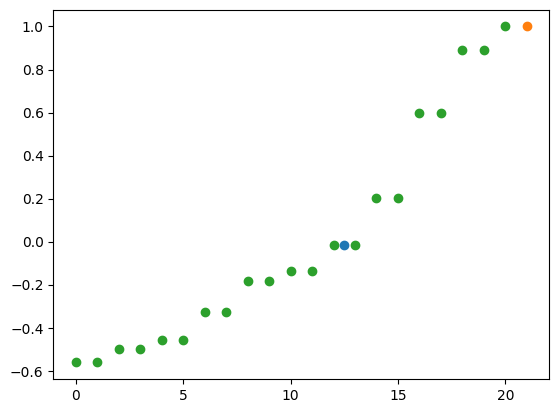

In [33]:
# Now we control the eigenvalues using a linalg solver
eig_val_check, eig_vec_check = np.linalg.eigh(t_matrix)

print(eig_val_check)
def index_gen(li):
    return list(range(len(eig_val_check)))


plt.scatter(2*6+0.5,-eig_val_small)
plt.scatter(21,eig_val_big)
plt.scatter(index_gen(eig_val_check),eig_val_check)

plt.show()

"""
Pattern: every eignvalues except for one appears twice (degeneracy)
"""
